

Kaggle'dan gelen kodlar


In [24]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'smoking-drinking-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3679617%2F6386941%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T134002Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f6d30a06db005d141432fd06f27427fe7648012de55c9a6af1d8a225b369922898c485dbfb48e1eea344cb3eac28b84c6d9c07b818809d350309360777aa3f9bfb39100f1d016860bbbb69ad00e6411db2296bf9a71ad56781ff018fe6def76262ce31269c7963c099ae87dd844e414a66eb85b54fbafb95cf8201025e42589c34d433d17966684554e742fc79b380b6c582296d1cd09d6d8ee982b280e42ae1bf7dedb9c15e00f1f338611cd8754774b8616819049980c3d223f6f5be386bd1d03d7aeb04c79ba2bb6687fcf2673c977b2909a7bee3e5a5d0000d698e9f5ca7e44da912b731973c03f3e12ffff146703871c7c51429265e0388717479b9369'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 28818708 bytes downloaded
Downloaded and uncompressed: smoking-drinking-dataset
Data source import complete.


In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv


Veri setinin içeri aktarılması ve veriyi tanıma adına yapılan bazı işlemler

In [26]:
#Veri setinden 12000 tane veri çekmek (yaklaşık 12 mb)
df=pd.read_csv('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv', nrows=12000)

In [27]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df.shape

(12000, 24)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,12000.0,47.515417,14.226441,20.0,35.0,45.0,60.0,85.0
height,12000.0,162.290000,9.326744,135.0,155.0,160.0,170.0,190.0
weight,12000.0,63.229167,12.544179,30.0,55.0,60.0,70.0,130.0
waistline,12000.0,81.256342,12.780012,49.0,74.0,81.0,87.6,999.0
sight_left,12000.0,0.981650,0.608354,0.1,0.7,1.0,1.2,9.9
sight_right,12000.0,0.981292,0.614126,0.1,0.7,1.0,1.2,9.9
hear_left,12000.0,1.030000,0.170594,1.0,1.0,1.0,1.0,2.0
hear_right,12000.0,1.029250,0.168514,1.0,1.0,1.0,1.0,2.0
SBP,12000.0,122.615667,14.591363,75.0,112.0,121.0,131.0,230.0
DBP,12000.0,76.177000,9.975284,46.0,70.0,76.0,82.0,160.0


In [8]:
# Boş Değerleri Görüntüleme
df.isna().sum()

,0
sex,0
age,0
height,0
weight,0
waistline,0
sight_left,0
sight_right,0
hear_left,0
hear_right,0
SBP,0


In [9]:
#Tekil değerleri görüntüleme
df.nunique()

,0
sex,2
age,14
height,12
weight,20
waistline,449
sight_left,16
sight_right,18
hear_left,2
hear_right,2
SBP,112


In [10]:
#Veri genel bakış
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,12000.0,47.515417,14.226441,20.0,35.0,45.0,60.0,85.0
height,12000.0,162.290000,9.326744,135.0,155.0,160.0,170.0,190.0
weight,12000.0,63.229167,12.544179,30.0,55.0,60.0,70.0,130.0
waistline,12000.0,81.256342,12.780012,49.0,74.0,81.0,87.6,999.0
sight_left,12000.0,0.981650,0.608354,0.1,0.7,1.0,1.2,9.9
sight_right,12000.0,0.981292,0.614126,0.1,0.7,1.0,1.2,9.9
hear_left,12000.0,1.030000,0.170594,1.0,1.0,1.0,1.0,2.0
hear_right,12000.0,1.029250,0.168514,1.0,1.0,1.0,1.0,2.0
SBP,12000.0,122.615667,14.591363,75.0,112.0,121.0,131.0,230.0
DBP,12000.0,76.177000,9.975284,46.0,70.0,76.0,82.0,160.0


In [50]:
#Drinking değerinin veri setinden atılması
X=df.drop(columns=['DRK_YN'],axis=1)
y = df.DRK_YN

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn import tree



In [52]:
#train test ayırma
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Gözetimli Öğrenme(CatBoost)

In [53]:
#Catboost İndirme ve import etme
#sklearndan kullanılabilecek parçalarım importu
!pip install catboost
import catboost as cb
import numpy as np
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

In [54]:
#Modelin eğitilmesi
categorical_features_indices = np.where(X.dtypes == object)[0]
train_pool=Pool(X_train,y_train,cat_features=categorical_features_indices)
test_pool=Pool(X_test,y_test,cat_features=categorical_features_indices)
model=CatBoostClassifier(custom_loss=[metrics.Accuracy()],# loss
                         random_seed=42,
                         logging_level='Silent',
                         task_type='GPU')
model.fit(train_pool,
          eval_set=test_pool,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
from sklearn.metrics import log_loss, accuracy_score

# Tahminler
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Kayıp hesaplama
loss = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"Log Loss: {loss}")
print(f"Accuracy: {accuracy}")


Log Loss: 0.5322367256097387
Accuracy: 0.7327777777777778


In [17]:
#Modelin Doğruluğunu Yazdırma
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           N       0.73      0.72      0.72      1793
           Y       0.72      0.73      0.73      1807

    accuracy                           0.72      3600
   macro avg       0.72      0.72      0.72      3600
weighted avg       0.72      0.72      0.72      3600



# Gözetimsiz(KMeans) Öğrenme

In [46]:
#Gerekli Kütüpphane import işlemleri
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Veri Ön İşleme

In [19]:
#Cinsiyet Sütununu Label Encoder ile Encodelama

le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[['age', 'height', 'weight', 'waistline', 'SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','SGOT_AST','SGOT_ALT',
'gamma_GTP']] = scaler.fit_transform(df[['age', 'height', 'weight', 'waistline', 'SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','SGOT_AST','SGOT_ALT',
'gamma_GTP']])

In [28]:
#KMeans ile modelin eğitilmesi
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [29]:
# Kümeleri değerlendirmek için Adjusted Rand Index kullan
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Homojenlik Skoru:", homogeneity_score(y, kmeans.labels_))
print("Completentlik Skoru:", completeness_score(y, kmeans.labels_))
print("V-Measure Skoru:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: -8.312552167037454e-07
Homojenlik Skoru: 8.30385061038485e-05
Completentlik Skoru: 0.06645982873581428
V-Measure Skoru: 0.00016586976554755863


In [37]:
kmeans = KMeans(n_clusters=2, random_state=65)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [38]:
# Kümeleri değerlendirmek için Adjusted Rand Index kullan
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Homojenlik Skoru:", homogeneity_score(y, kmeans.labels_))
print("Completentlik Skoru:", completeness_score(y, kmeans.labels_))
print("V-Measure Skoru:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: -8.312552167037454e-07
Homojenlik Skoru: 8.30385061038485e-05
Completentlik Skoru: 0.06645982873581428
V-Measure Skoru: 0.00016586976554755863


# EDA

## Sayısal EDA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               12000 non-null  object 
 1   age               12000 non-null  int64  
 2   height            12000 non-null  int64  
 3   weight            12000 non-null  int64  
 4   waistline         12000 non-null  float64
 5   sight_left        12000 non-null  float64
 6   sight_right       12000 non-null  float64
 7   hear_left         12000 non-null  float64
 8   hear_right        12000 non-null  float64
 9   SBP               12000 non-null  float64
 10  DBP               12000 non-null  float64
 11  BLDS              12000 non-null  float64
 12  tot_chole         12000 non-null  float64
 13  HDL_chole         12000 non-null  float64
 14  LDL_chole         12000 non-null  float64
 15  triglyceride      12000 non-null  float64
 16  hemoglobin        12000 non-null  float6

In [7]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,47.515417,162.290000,63.229167,81.256342,0.981650,0.981292,1.030000,1.029250,122.615667,76.177000,...,57.424167,113.041417,133.719083,14.250133,1.093500,0.860767,25.978333,25.814167,37.330417,1.621750
std,14.226441,9.326744,12.544179,12.780012,0.608354,0.614126,0.170594,0.168514,14.591363,9.975284,...,75.061825,57.190555,135.042000,1.564969,0.433905,0.301924,16.284670,20.291922,50.075796,0.825167
min,20.000000,135.000000,30.000000,49.000000,0.100000,0.100000,1.000000,1.000000,75.000000,46.000000,...,4.000000,1.000000,16.000000,6.200000,1.000000,0.100000,4.000000,2.000000,3.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,121.000000,76.000000,...,55.000000,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.600000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,65.000000,134.000000,160.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000
max,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,9490.000000,20.300000,6.000000,16.400000,911.000000,430.000000,999.000000,3.000000


In [8]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [9]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [11]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

## Görsel EDA


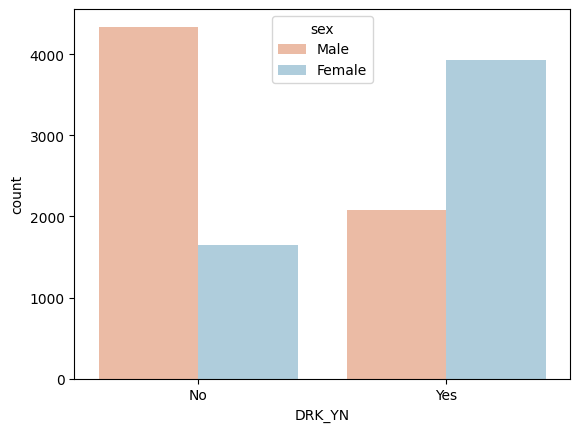

In [14]:
#Alkol kullananların cinsiyete göre dağılımları
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='DRK_YN', hue='sex', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

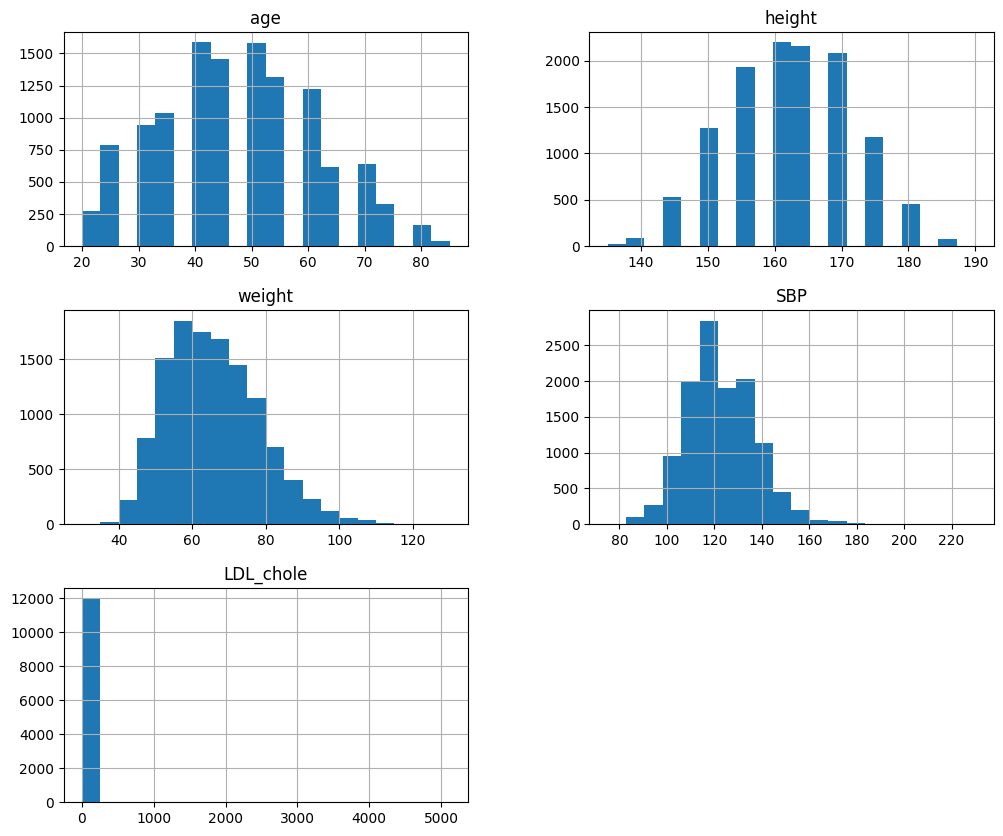

In [18]:
#değişkenlerin grafikleri
import matplotlib.pyplot as plt
df[['age', 'height', 'weight', 'SBP', 'LDL_chole']].hist(figsize=(12, 10), bins=20)
plt.show()


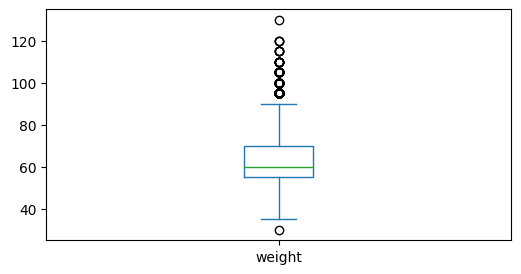

In [21]:
#Aykırı değer görmek için kutu grafiği
df[['weight']].plot.box(figsize=(6, 3))
plt.show()


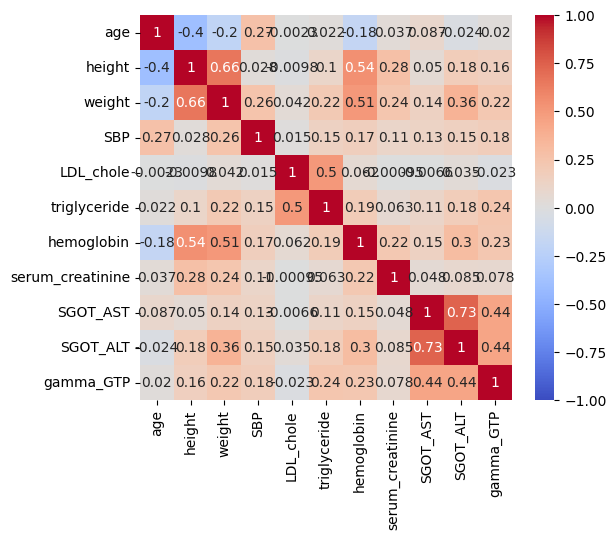

In [22]:
#Değişkenlerin Korelasyon grafiği
import seaborn as sns
corr = df[['age', 'height', 'weight', 'SBP', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


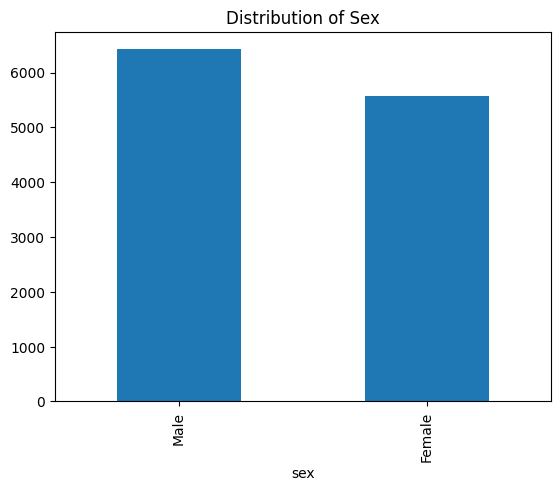

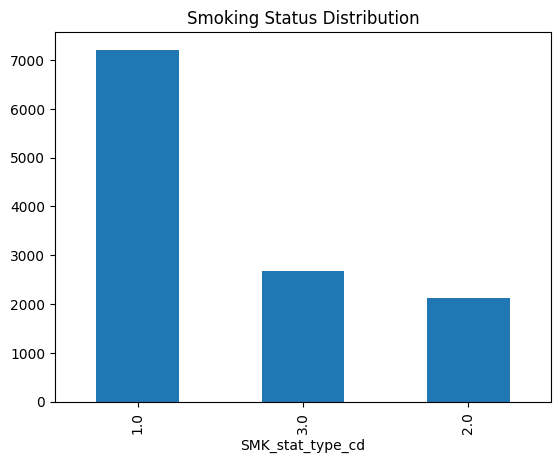

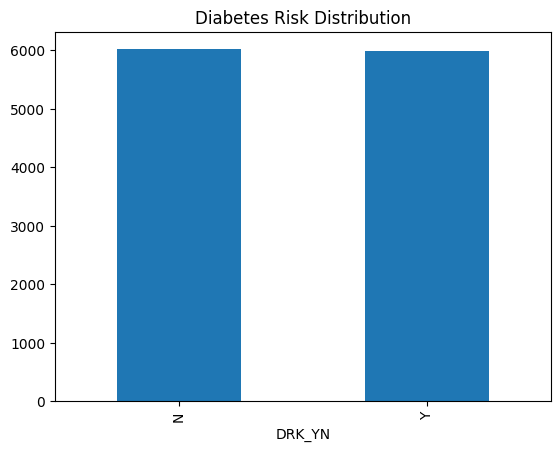

In [23]:
#kategorik verilerin dağılımı
df['sex'].value_counts().plot(kind='bar', title='Distribution of Sex')
plt.show()

df['SMK_stat_type_cd'].value_counts().plot(kind='bar', title='Smoking Status Distribution')
plt.show()

df['DRK_YN'].value_counts().plot(kind='bar', title='Diabetes Risk Distribution')
plt.show()


# Model Değerlendirme

1. Algoritmaların Amacı:

CatBoost (Gözetimli Öğrenme): Bu algoritma, etiketli verilerle (girişler ve doğru sonuçlar) eğitilir ve sınıflandırma ya da regresyon problemlerini çözmek için kullanılır. Yani, hangi girişin hangi sonuca karşılık geldiğini bilir ve buna göre bir model oluşturur. Bu yüzden, girdi ile çıktılar arasında doğrudan bir ilişki kurarak tahminler yapar. Sonuç olarak, etiketlenmiş veri setlerinde yüksek doğruluk oranlarına ulaşması beklenir.

K-Means (Gözetimsiz Öğrenme): K-Means algoritması, etiketsiz verilerle çalışır ve verileri sadece özellikleri arasındaki benzerliklere dayanarak kümeler (gruplar) oluşturur. Yani, algoritmanın elinde sınıflandırma yapmak için bir "doğru cevap" yoktur. K-Means'ın çıktıları, sınıf etiketleriyle değil, veri noktalarının kümelere atanmasıyla ilgilidir. Bu algoritma, etiketli bir veri seti üzerinde doğruluk hesaplandığında yanlış bir değerlendirme yöntemi olabilir çünkü K-Means, sınıflandırma yapmak yerine kümeler oluşturur. Sonuç olarak, doğruluk oranının düşük çıkması normaldir.

In [55]:
from sklearn.metrics import log_loss, accuracy_score

# Tahminler
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Kayıp hesaplama
loss = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"Log Loss: {loss}")
print(f"Accuracy: {accuracy}")
#Modelin Doğruluğunu Yazdırma
print(classification_report(model.predict(X_test),y_test))

Log Loss: 0.5268640081961408
Accuracy: 0.7341666666666666
              precision    recall  f1-score   support

           N       0.71      0.75      0.73      1741
           Y       0.76      0.72      0.74      1859

    accuracy                           0.73      3600
   macro avg       0.73      0.73      0.73      3600
weighted avg       0.74      0.73      0.73      3600

